In [2]:
!pip install -U finance-datareader

     |████████████████████████████████| 48 kB 1.9 MB/s 


In [3]:
import numpy
import pandas as pd
import FinanceDataReader as fdr
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

금융 시장에서 변동성은 수익률이 움직이는 정도로서, 일반적으로 표준편차가 사용됩니다. 표준편차는 자료가 평균을 중심으로 얼마나 퍼져 있는지를 나타내는 수치로서, 수식은 다음과 같습니다.

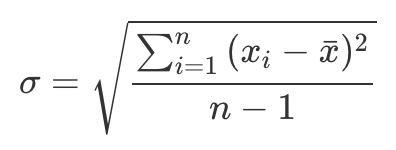

관측값의 개수가 적을 경우에는 수식에 대입해 계산하는 것이 가능하지만, 관측값이 수백 혹은 수천 개로 늘어날 경우 컴퓨터를 이용하지 않고 계산하기는 사실상 불가능합니다. R에서는 복잡한 계산 과정 없이 sd() 함수를 이용해 간단하게 표준편차를 계산할 수 있습니다.

In [4]:
example = [85, 76, 73, 80, 72]
# standard deviation
# 모표준편차(분모 n)
std = numpy.std(example)
print(std)
# 표본표준편차(분모 n - 1)
# ddof: delta degrees of freedom (자유도)
std = numpy.std(example, ddof=1)
print(std)

4.791659420284375
5.357238094391549


개별 주식의 표준편차를 측정할 때는 주식의 가격이 아닌 수익률로 계산해야 합니다.(두 주식이 같은 변동성을 보이더라도 주가가 높으면 표준편차 또한 커져서 변동성이 커보인다.)
수익률의 표준편차가 크면 수익률이 위아래로 많이 움직여 위험한 종목으로 여겨집니다. 반면 표준편차가 작으면 수익률의 움직임이 적어 상대적으로 안전한 종목으로 여겨집니다.

전통적 금융 이론에서는 수익률의 변동성이 클수록 위험이 크고, 이런 위험에 대한 보상으로 기대수익률이 높아야 한다고 보았습니다. 따라서 고변동성 종목의 기대수익률이 크고, 저변동성 종목의 기대수익률이 낮은 고위험 고수익이 당연한 믿음이었습니다. 그러나 현실에서는 오히려 변동성이 낮은 종목들의 수익률이 변동성이 높은 종목들의 수익률보다 높은, 저변동성 효과가 발견되고 있습니다. 이러한 저변동성 효과가 발생하는 원인으로는 여러 가설이 있습니다.

1. 투자자들은 대체로 자신의 능력을 과신하는 경향이 있으며, 복권과 같이 큰 수익을 가져다 주는 고변동성 주식을 선호하는 경향이 있습니다. 이러한 결과로 고변동성 주식은 과대 평가되어 수익률이 낮은 반면, 과소 평가된 저변동성 주식들은 높은 수익률을 보이게 됩니다. (Brunnermeier and Parker 2005)

2. 대부분 기관투자가들이 레버리지 투자가 되지 않는 상황에서, 벤치마크 대비 높은 성과를 얻기 위해 고변동성 주식에 투자하는 경향이 있으며, 이 또한 고변동성 주식이 과대 평가되는 결과로 이어집니다. (Baker, Bradley, and Wurgler 2011)

3. 시장의 상승과 하락이 반복됨에 따라 고변동성 주식이 변동성 손실(Volatility Drag)로 인해 수익률이 하락하게 되는 이유도 있습니다. (Sefton et al. 2011)

주식의 위험은 변동성뿐만 아니라 베타 등 여러 지표로도 측정할 수 있습니다. 저변동성 효과와 비슷하게 고유변동성이 낮은 주식의 수익률이 높은 저고유변동성 효과(Ang et al. 2009), 베타가 낮은 주식의 수익률이 오히려 높은 저베타 효과(Baker, Bradley, and Taliaferro 2014)도 발견되고 있으며, 이러한 효과들을 합쳐 저위험 효과라고 부르기도 합니다.

In [5]:
# 시가총액 순위 순으로
df_krx = fdr.StockListing("KRX-MARCAP")
df_krx

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
1,005930,삼성전자,KOSPI,,66600,2,-1300,-1.91,67000,67100,66500,9761367,651512955000,397587517830000,5969782550,STK
2,373220,LG에너지솔루션,KOSPI,,399000,2,-2500,-0.62,395000,399500,390000,243089,96255827500,93366000000000,234000000,STK
3,000660,SK하이닉스,KOSPI,,108000,2,-1500,-1.37,108000,108500,106500,1929761,207521737500,78624255420000,728002365,STK
4,207940,삼성바이오로직스,KOSPI,,801000,2,-14000,-1.72,804000,809000,800000,29301,23507324500,57010374000000,71174000,STK
5,005935,삼성전자우,KOSPI,,59800,2,-800,-1.32,60000,60100,59400,901178,53924029900,49208624660000,822886700,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,009275,신원우,KOSPI,,32350,2,-1600,-4.71,33950,34000,32350,617,20531400,2935439000,90740,STK
2621,215050,비엔디생활건강,KONEX,일반기업부,912,0,0,0.00,0,0,0,0,0,1934959392,2121666,KNX
2622,329020,오션스톤,KONEX,일반기업부,2100,0,0,0.00,0,0,0,0,0,1753819200,835152,KNX
2623,267060,명진홀딩스,KONEX,일반기업부,191,1,24,14.37,191,191,191,1,191,1746084564,9141804,KNX


In [6]:
def item_code_by_item_name(item_name):
    item_code_list = df_krx.loc[df_krx["Name"] == item_name, "Symbol"].tolist()
    if len(item_code_list) > 0:
        item_code = item_code_list[0]
        return item_code
    else:
        return False

In [7]:
def find_item_list(item_code, year=2021):
    if item_code:
        df_day = fdr.DataReader(item_code, str(year))
        return df_day
    else:
        return False

In [8]:
find_item_list("005930")

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691
2021-01-05,81600,83900,81600,83900,35335669,0.010843
2021-01-06,83300,84500,82100,82200,42089013,-0.020262
2021-01-07,82800,84200,82700,82900,32644642,0.008516
2021-01-08,83300,90000,83000,88800,59013307,0.071170
...,...,...,...,...,...,...
2022-04-29,65100,67600,65000,67400,26190390,0.040123
2022-05-02,66600,67600,66500,67300,14106184,-0.001484
2022-05-03,67400,68400,67300,67500,14168875,0.002972


In [9]:
columns = ["item_code", "item_name", "std"]
df_krx_std = pd.DataFrame(columns=columns)
df_krx_std["item_code"] = df_krx["Code"]
df_krx_std["item_name"] = df_krx["Name"]
for idx, row in tqdm(df_krx.iterrows(), total=df_krx.shape[0]):
    if(idx > 200): break
    tmp = find_item_list(row["Code"])
    if(tmp.isna().any().any() or tmp.empty): continue
    df_krx_std.loc[idx, "std"] = numpy.std(tmp["Change"], ddof=1)
df_krx_std = df_krx_std.dropna(axis=0)
df_krx_std

  0%|          | 0/2624 [00:00<?, ?it/s]

,item_code,item_name,std
1,005930,삼성전자,0.01332
3,000660,SK하이닉스,0.022586
4,207940,삼성바이오로직스,0.020425
5,005935,삼성전자우,0.012039
6,035420,NAVER,0.020665
...,...,...,...
196,010120,LS ELECTRIC,0.020927
197,017800,현대엘리베이,0.017021
198,020560,아시아나항공,0.025498
199,365550,ESR켄달스퀘어리츠,0.014036


In [10]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [11]:
import matplotlib.pyplot as plt

# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당
font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프 스타일 설정
plt.style.use("ggplot")

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


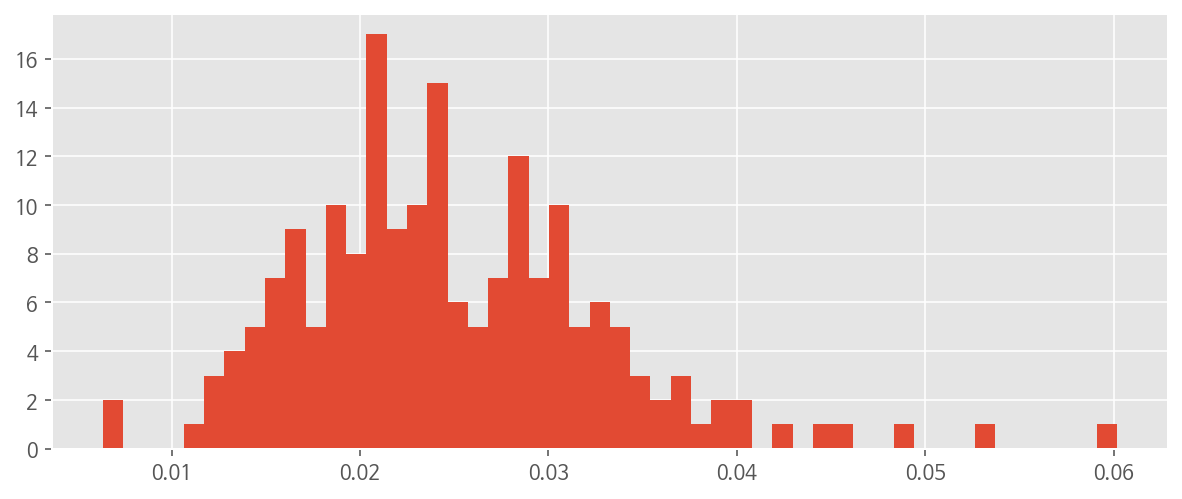

In [12]:
df_krx_std["std"].hist(figsize=(10, 4), bins=50)

In [13]:
PORTFOLIO_SIZE = 20

In [14]:
df_krx_std.sort_values(by=["std"], ascending=True, inplace=True)
df_krx_std_low = df_krx_std.head(PORTFOLIO_SIZE)

In [15]:
df_std_portfolio = pd.DataFrame()
for idx, row in tqdm(df_krx_std_low.iterrows(), total=PORTFOLIO_SIZE):
    tmp = find_item_list(row["item_code"])
    if(df_std_portfolio.empty): df_std_portfolio = tmp["Close"] / tmp["Close"].iloc[0] - 1
    else: df_std_portfolio += tmp["Close"] / tmp["Close"].iloc[0] - 1
df_std_portfolio = df_std_portfolio / PORTFOLIO_SIZE
df_std_portfolio

  0%|          | 0/20 [00:00<?, ?it/s]

Date
2021-01-04    0.000000
2021-01-05    0.017073
2021-01-06    0.017829
2021-01-07    0.030000
2021-01-08    0.042572
                ...   
2022-04-29    0.099963
2022-05-02    0.097171
2022-05-03    0.089964
2022-05-04    0.092287
2022-05-06    0.081005
Name: Close, Length: 332, dtype: float64

66         맥쿼리인프라
37           KT&G
181           오뚜기
129           에스원
5           삼성전자우
93           삼성카드
88          쌍용C&E
1            삼성전자
50           기업은행
61         LG유플러스
199    ESR켄달스퀘어리츠
179        JB금융지주
47             KT
15           신한지주
169            농심
103        NH투자증권
101          삼성증권
74         미래에셋증권
123         GS리테일
175         현대백화점
Name: item_name, dtype: object

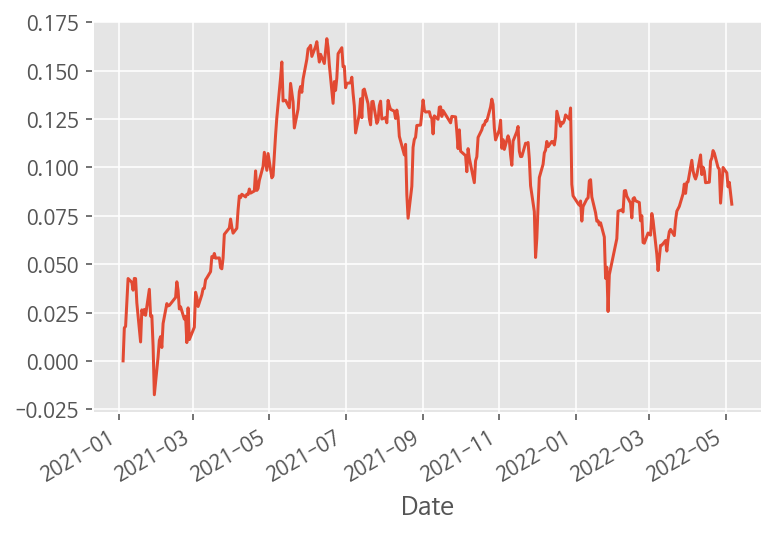

In [16]:
df_std_portfolio.plot()
df_krx_std_low["item_name"]

In [17]:
df_krx_std_high = df_krx_std.tail(PORTFOLIO_SIZE)

In [ ]:
df_std_portfolio = pd.DataFrame()
for idx, row in tqdm(df_krx_std_high.iterrows(), total=PORTFOLIO_SIZE):
    tmp = find_item_list(row["item_code"])
    if(df_std_portfolio.empty): df_std_portfolio = tmp["Close"] / tmp["Close"].iloc[0] - 1
    else: df_std_portfolio += tmp["Close"] / tmp["Close"].iloc[0] - 1
df_std_portfolio = df_std_portfolio / PORTFOLIO_SIZE
df_std_portfolio

  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
df_std_portfolio.plot()
df_krx_std_high["item_name"]